## Table of content

1. Introduction
2. Goal
3. Import Datset & libraries
4. Overview
5. EDA
6. Data Pre-processing
7. Splitting
8. Modelling
9.  Oversampling
10. Conclusions
11. References

Data Preparation

● Characterisation of the data set: size; number of attributes; has/does not have missing values,
number of observations etc.[0-10]


● Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA (Exploratory
Data Analysis) visualizations (plural), including a clear and concise explanation of your rationale for
what you are doing with the data and why you are doing it.[0-20]


● Apply encoding, scaling and feature engineering as and if required, detailing how and why you used
these techniques and the rationale for your decisions.[0-30]


● Explore the possibility of using dimensional reduction on the dataset. Employ both LDA (Linear
Discriminant Analysis) and PCA (Principal Component Analysis) and compare the separation of
classes through visualization. Explain the difference between both techniques in your own words
and discuss in detail how your results may affect your analysis of classifying or clustering the normal
as compared to anomalous biddings.[0-40]

Introduction

What is Employee Attrition?

Employee attrition is a natural process where an employee leave the workforce. Some of them are unavoidables, such as retirement or involuntary, others can be voluntary, internal or demographic based. Attrition is an inevitable part of any business and it occurs when the workforce diminishes over time for personal or professional reasons of the employee. It is important also to mark the difference between the employee attrition and the turnover. Employee attrition create vacancies that are not immediately filled up, while turnover is a more short term metric and it can be addressed faster.

Goal

Import Datset & libraries

In [966]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [967]:
df = pd.read_csv('Employee_Attrition.csv')
df.shape

(1470, 35)

In [968]:
print("Our Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

Our Dataset has 1470 rows and 35 columns


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


float64    26
object      9
Name: count, dtype: int64

Overview

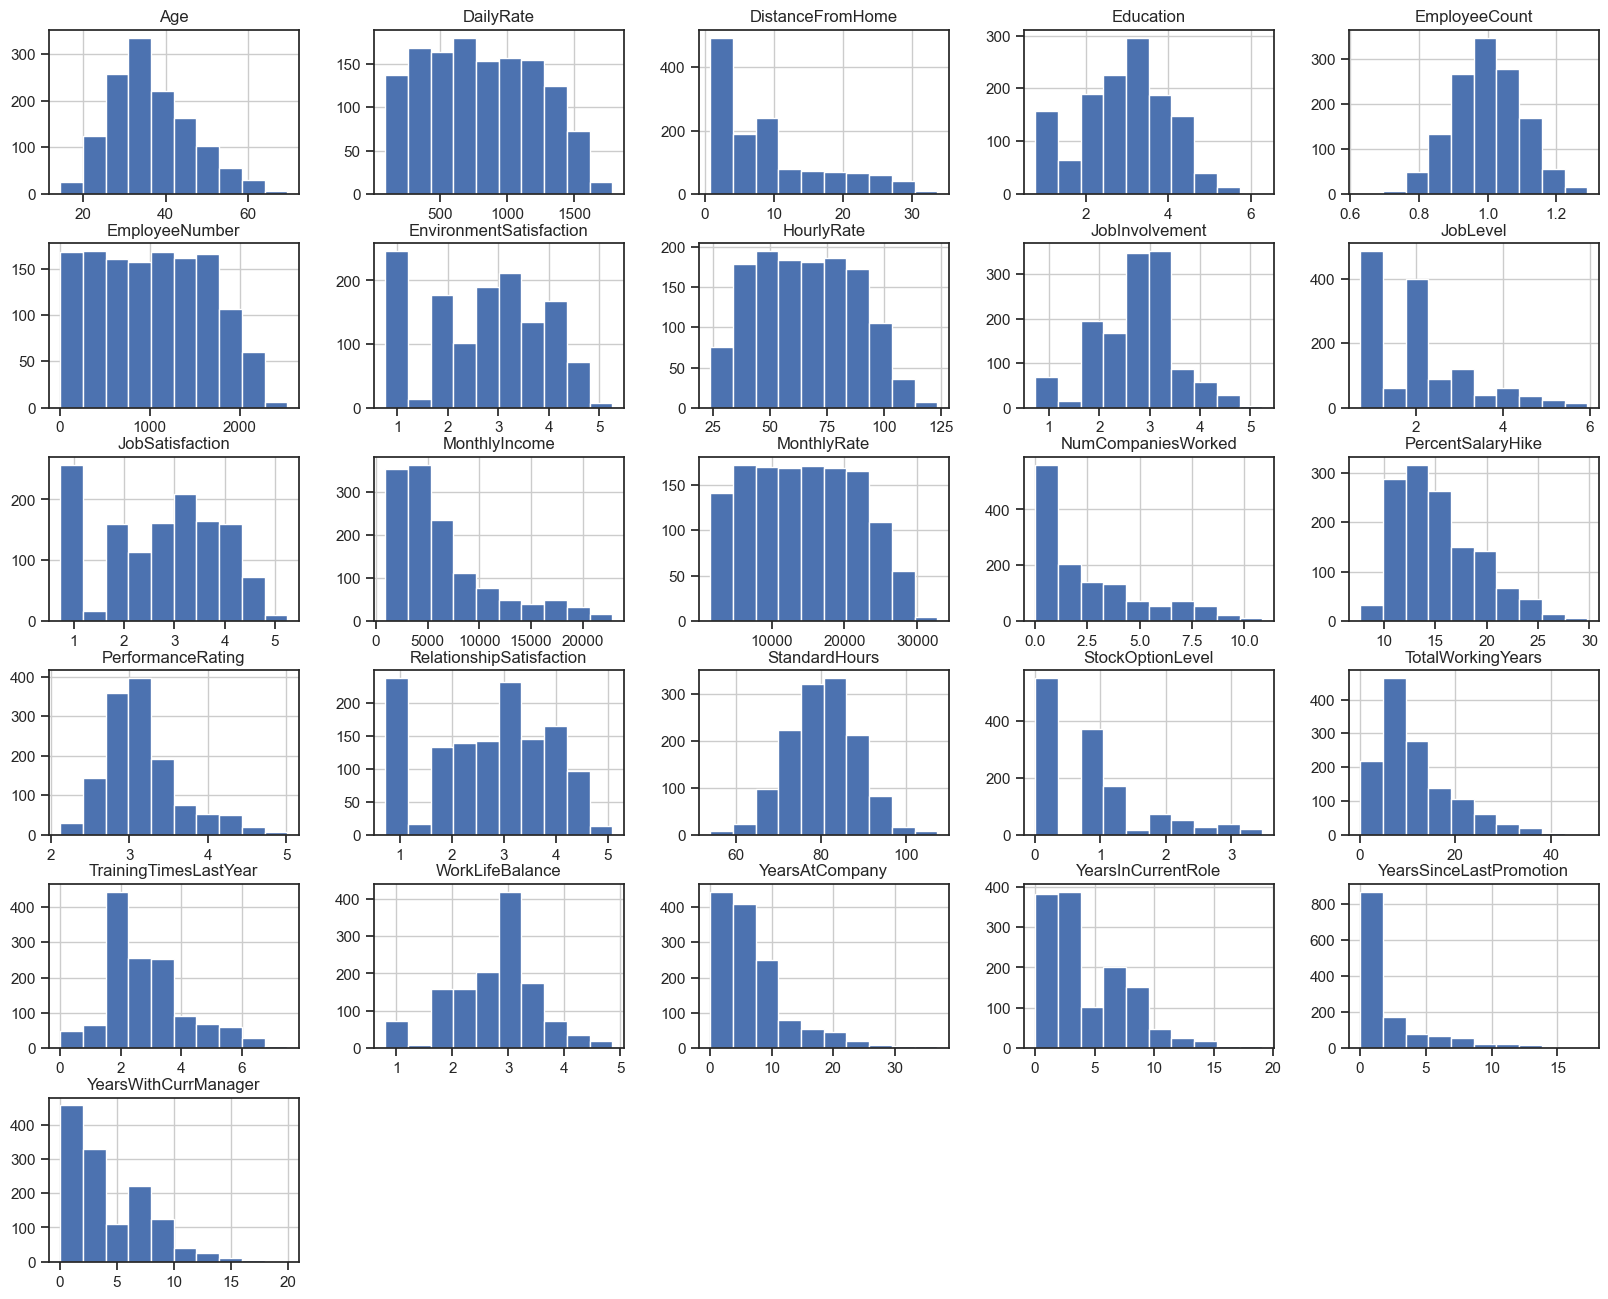

In [969]:
df.hist(figsize=(20, 16))
plt.show()

Some features look kind of normal distributed. Let's check with the in-built Pandas function fod data visualization if they really are

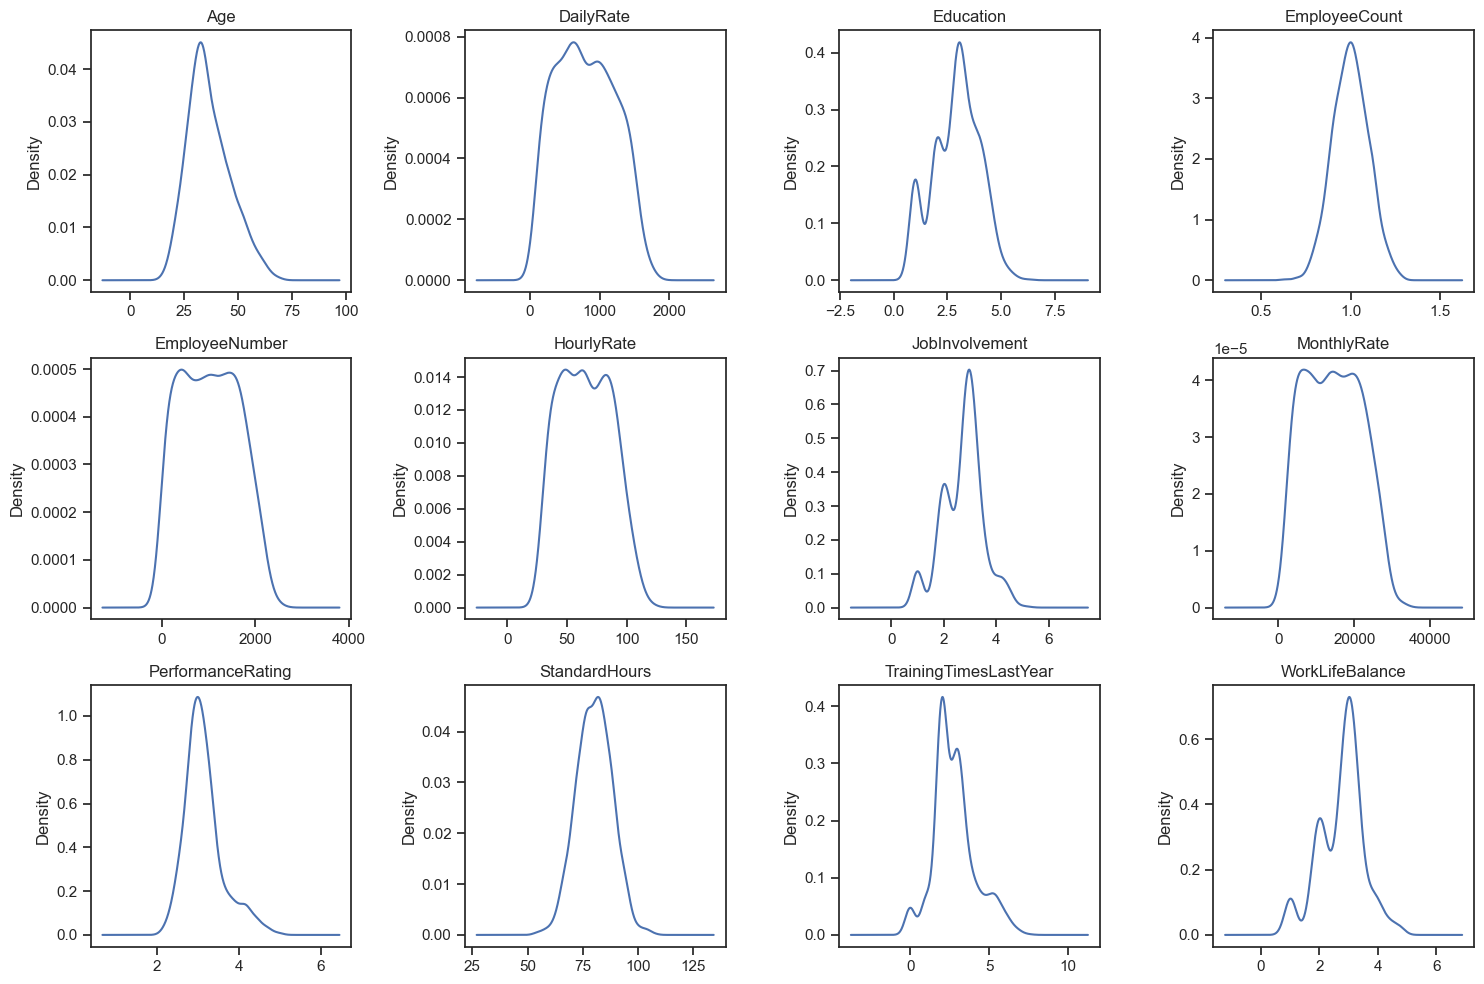

In [970]:
normal_distributed_features = ["Age", "DailyRate", "Education", "EmployeeCount", "EmployeeNumber", "HourlyRate", "JobInvolvement", "MonthlyRate","PerformanceRating", "StandardHours","TrainingTimesLastYear","WorkLifeBalance"]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(normal_distributed_features):
    df[column].plot(kind='kde', ax=axes[i], title=column)

plt.tight_layout()
plt.show()

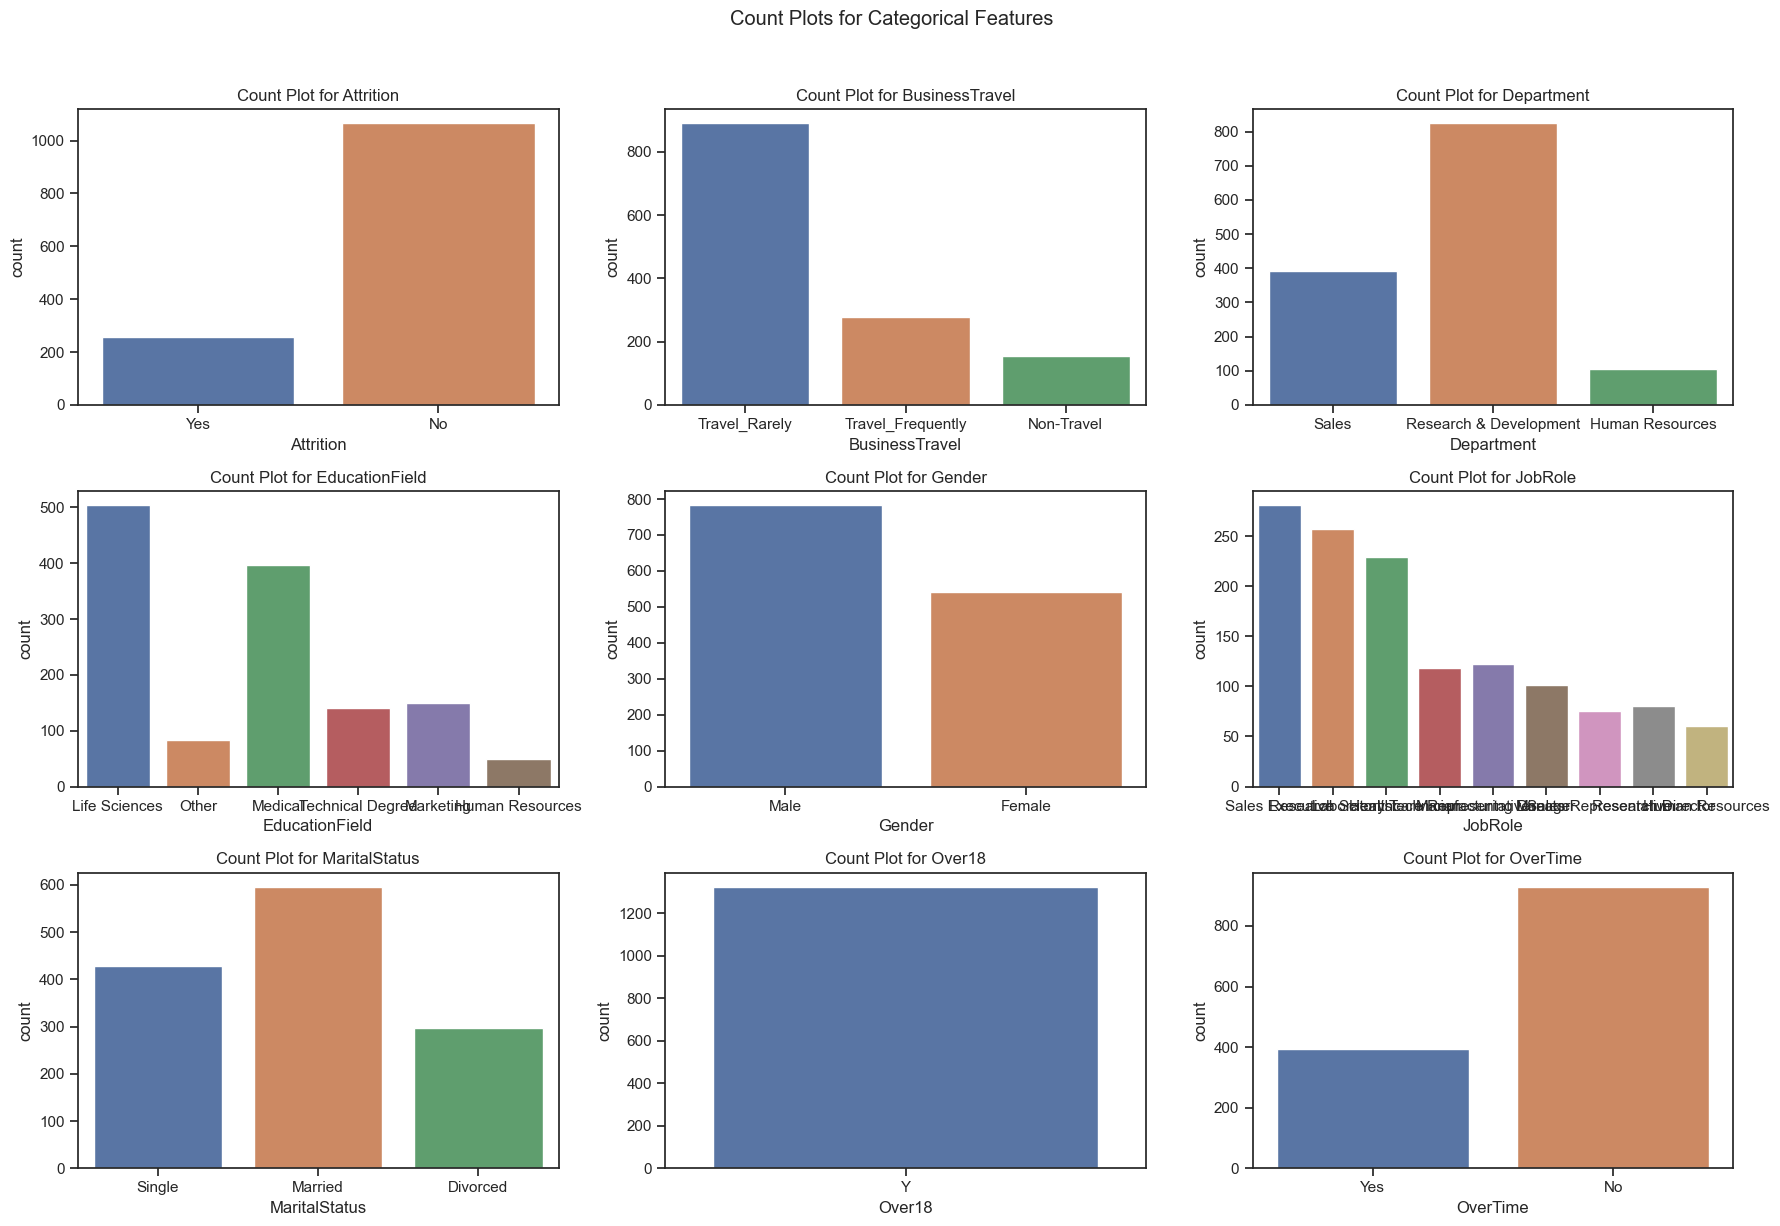

In [971]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot for {feature}')

plt.suptitle('Count Plots for Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

Let's have a look at the percentage of the feature with more variables which is JobRole

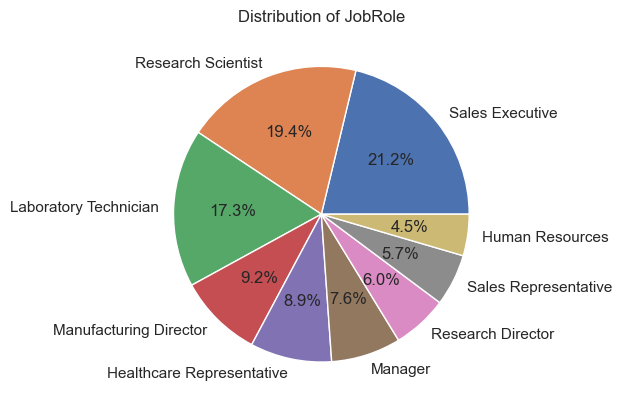

In [972]:
df['JobRole'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of JobRole')
plt.ylabel('')
plt.show()

We now want to examine the percentage of employees who achieve a certain milestone and the time it takes for them to do so

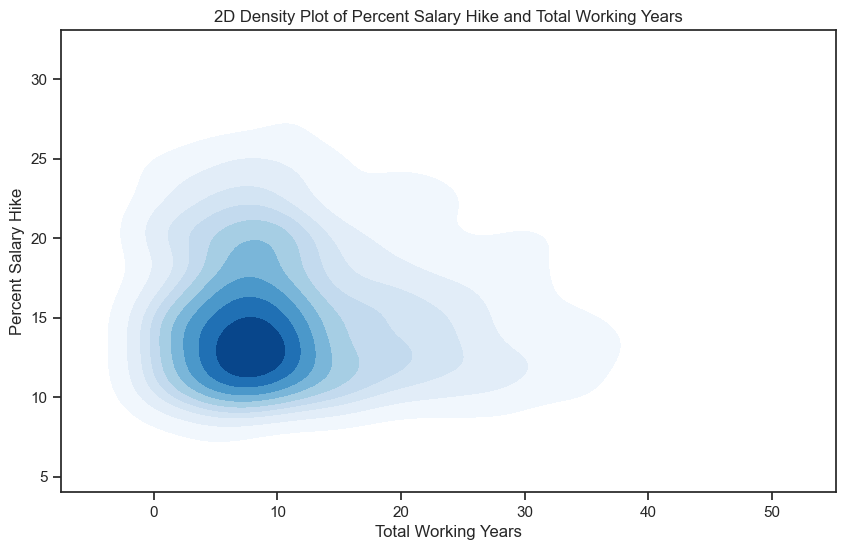

In [973]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='TotalWorkingYears', y='PercentSalaryHike', data=df, cmap='Blues', fill=True)
plt.title('2D Density Plot of Percent Salary Hike and Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Percent Salary Hike')
plt.show()

Missing values in the Dataset

In [974]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

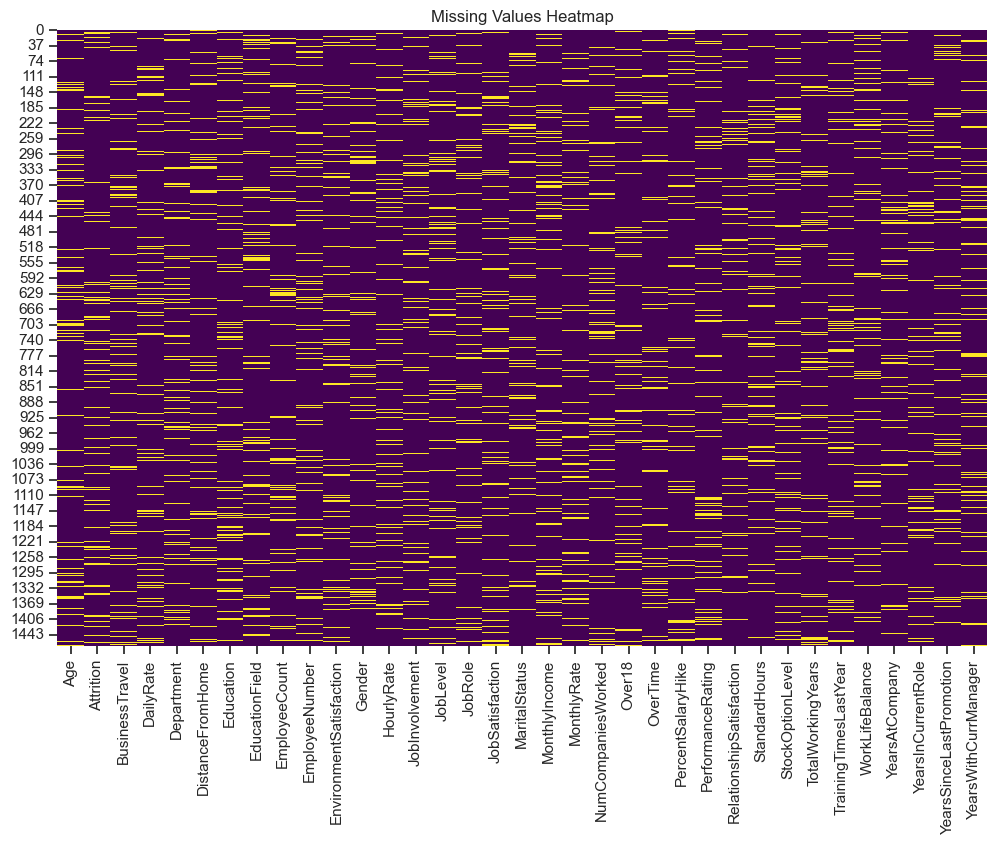

In [975]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Check for duplicated values

In [976]:
df.duplicated().sum() 

0

Our target variable

In [977]:
df["Attrition"].unique()

array(['Yes', 'No', nan], dtype=object)

In [978]:
df["Attrition"].value_counts(dropna=False)

Attrition
No     1065
Yes     258
NaN     147
Name: count, dtype: int64

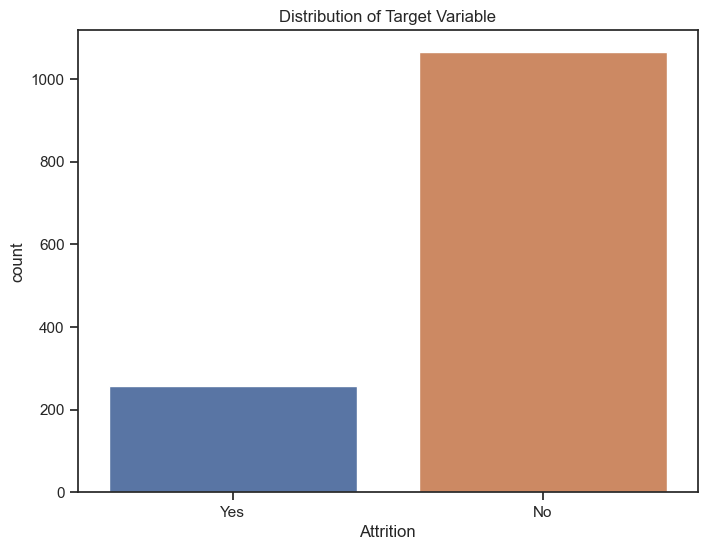

In [979]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Our target variable looks very unbalanced. In the Machine Learning steps, we will run our chosen models with and without balance it

In [980]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("First Attrition File.html")

EDA

Since Over18 has a constant value "YES", and missing values, let's create a bar plot which show us if the missing values have to be replaced or dropped

In [981]:
df['Over18'].fillna('UNKNOWN', inplace=True)

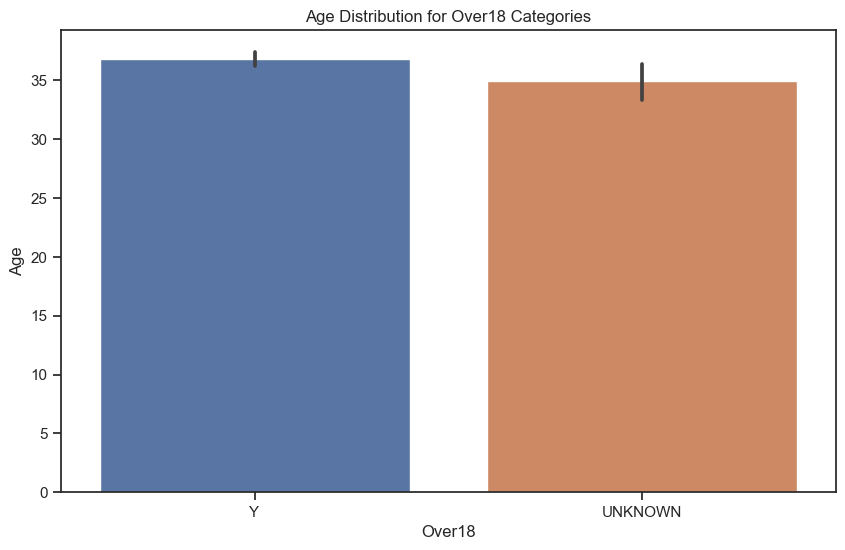

In [982]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Over18', y='Age', data=df)
plt.title('Age Distribution for Over18 Categories')
plt.xlabel('Over18')
plt.ylabel('Age')
plt.show()


If the corrisponding age is over or equal to 18 years old in "Over18" feature, we're going to replace the missing value with "Y"

In [983]:
df['Over18'].fillna('UNKNOWN', inplace=True)
df.loc[(df['Over18'] == 'UNKNOWN') & (df['Age'] >= 18), 'Over18'] = 'Y'
print(df['Over18'].value_counts())

Over18
Y          1456
UNKNOWN      14
Name: count, dtype: int64


In [984]:
unknown_age_records = df[df['Over18'] == 'UNKNOWN']
print(unknown_age_records[['Age', 'Over18']])

            Age   Over18
206   16.057972  UNKNOWN
609         NaN  UNKNOWN
705         NaN  UNKNOWN
717         NaN  UNKNOWN
746         NaN  UNKNOWN
870         NaN  UNKNOWN
1073        NaN  UNKNOWN
1089        NaN  UNKNOWN
1243        NaN  UNKNOWN
1248        NaN  UNKNOWN
1314        NaN  UNKNOWN
1382        NaN  UNKNOWN
1459        NaN  UNKNOWN
1468        NaN  UNKNOWN


Most of missing 'Over18' values don't have the age information and also they are relatively small and these rows don't carry critical information for our analysis so we choose to drop them

In [985]:
df = df[df['Over18'] != 'UNKNOWN']
print(df['Over18'].value_counts())

Over18
Y    1456
Name: count, dtype: int64


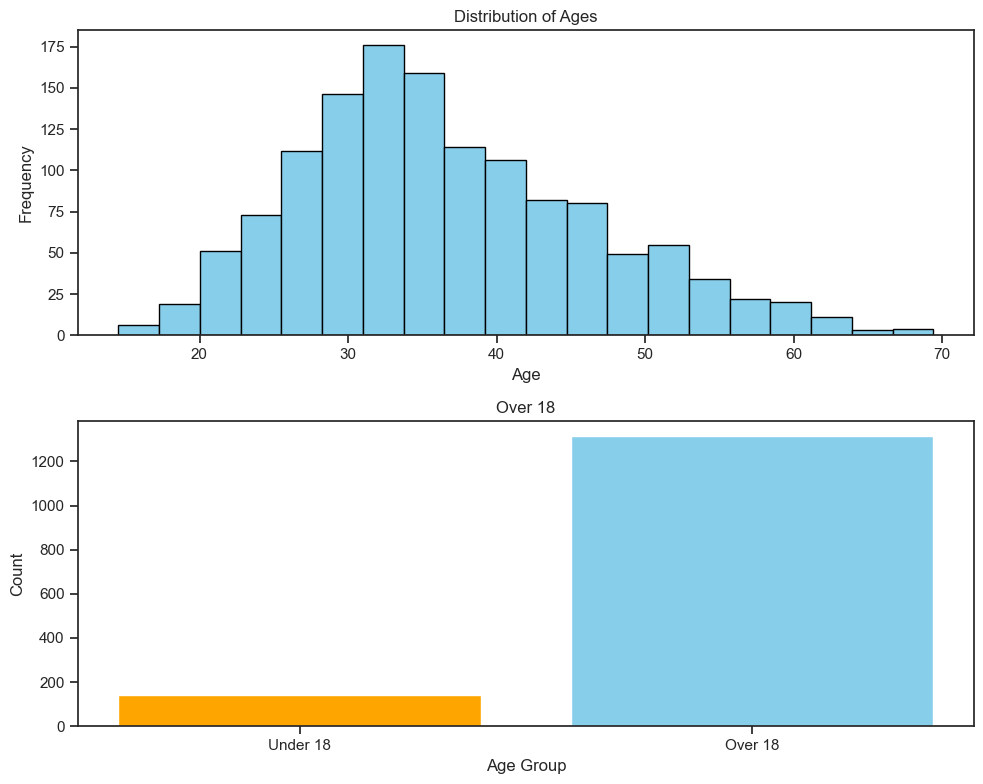

Over18
True     1316
False     140
Name: count, dtype: int64


In [986]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Ages')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

df['Over18'] = df['Age'] > 18
axes[1].bar(df['Over18'].value_counts().index, df['Over18'].value_counts(), color=['skyblue', 'orange'])
axes[1].set_title('Over 18')
axes[1].set_xticks([False, True])
axes[1].set_xticklabels(['Under 18', 'Over 18'])
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
print(df['Over18'].value_counts())

Use the mean for the normal distributed features

In [987]:
for feature in normal_distributed_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

Use the median for all the floating variables which have a skewed distribution or are concerned about the influence of outliers as we could see in the Overview

In [988]:
float_columns = df.select_dtypes(include='float64').columns
float_columns_to_impute = [col for col in float_columns if col not in normal_distributed_features]

for col in float_columns_to_impute:
    df[col].fillna(df[col].median(), inplace=True)

Looking at Age, we need to round it into integer values

In [989]:
df['Age'] = df['Age'].round().astype(int)
print(df['Age'].unique())

[42 52 33 35 25 30 62 27 37 28 21 60 34 24 31 32 44 48 41 40 29 46 22 39
 54 47 63 56 59 53 45 51 55 36 20 26 38 43 18 61 19 50 57 49 23 58 67 17
 65 69 68 15]


In [990]:
df.isnull().sum()

Age                           0
Attrition                   146
BusinessTravel              147
DailyRate                     0
Department                  147
DistanceFromHome              0
Education                     0
EducationField              145
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      147
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                     143
JobSatisfaction               0
MaritalStatus               146
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                    147
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [991]:
print("Integer columns:")
print(df.select_dtypes(include='int64' and 'int32').columns)
print("\nFloat columns:")
print(df.select_dtypes(include='float64').columns)
print("\nObject columns:")
print(df.select_dtypes(include='object').columns)

Integer columns:
Index(['Age'], dtype='object')

Float columns:
Index(['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Object columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In order to decide how can we Handle missing values in our target variable, is important to see the realtionship between  "Attrition" variable's missing values and other features. We also replace all the categorical features with the mode

In [992]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    if col != 'Attrition':
        df[col].fillna(df[col].mode()[0], inplace=True)

missing_values_after_drop = df.isnull().sum()
print(missing_values_after_drop)

Age                           0
Attrition                   146
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Let's create a Flag for Missing Values in Attrition

In [993]:
df['Attrition_Missing'] = df['Attrition'].isnull().astype(int)

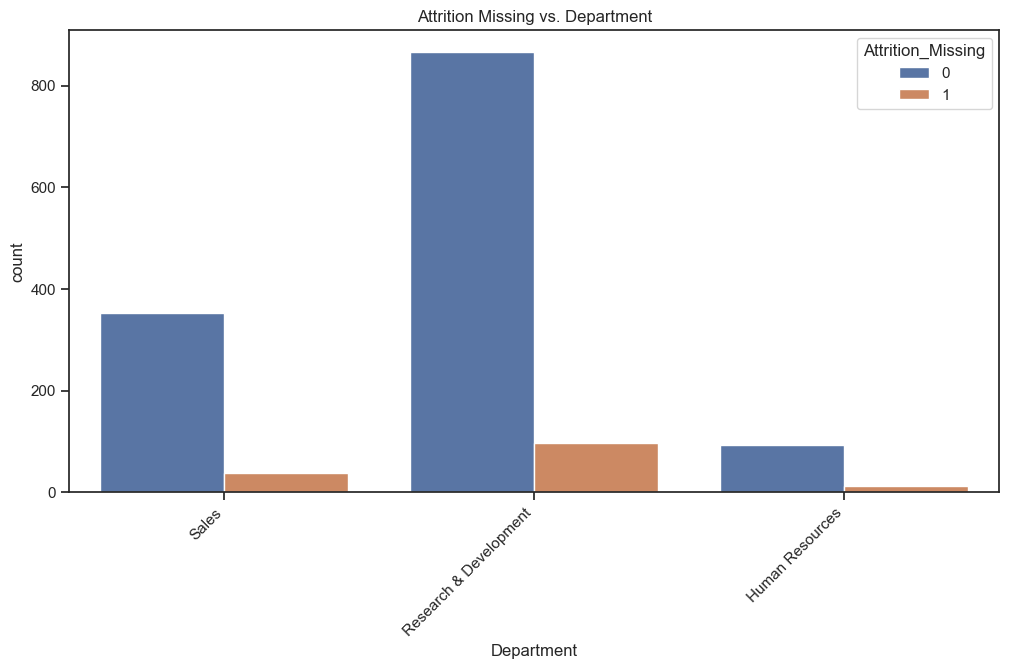

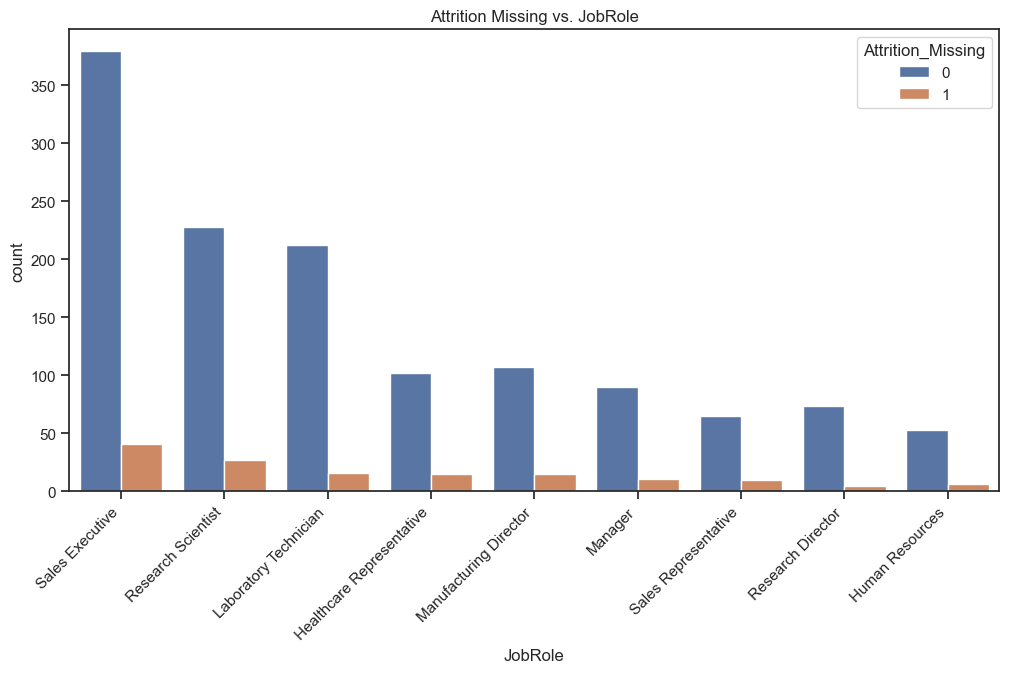

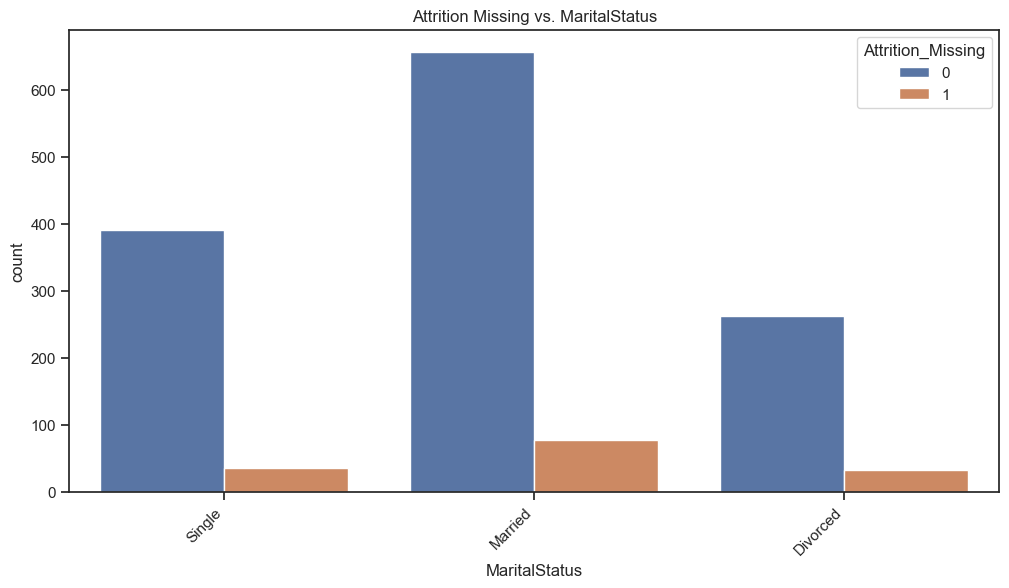

In [994]:
c_1 = ['Department', 'JobRole', 'MaritalStatus']

for feature in c_1:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Attrition_Missing', data=df)
    plt.title(f'Attrition Missing vs. {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

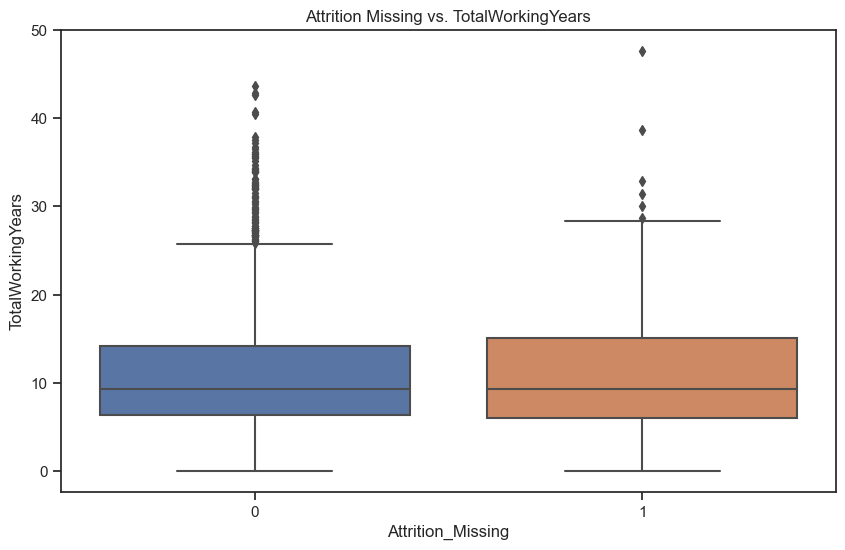

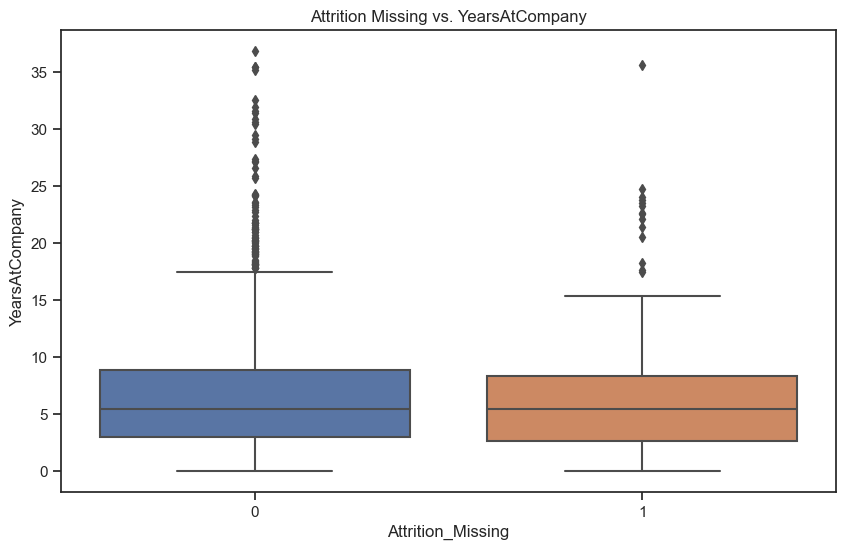

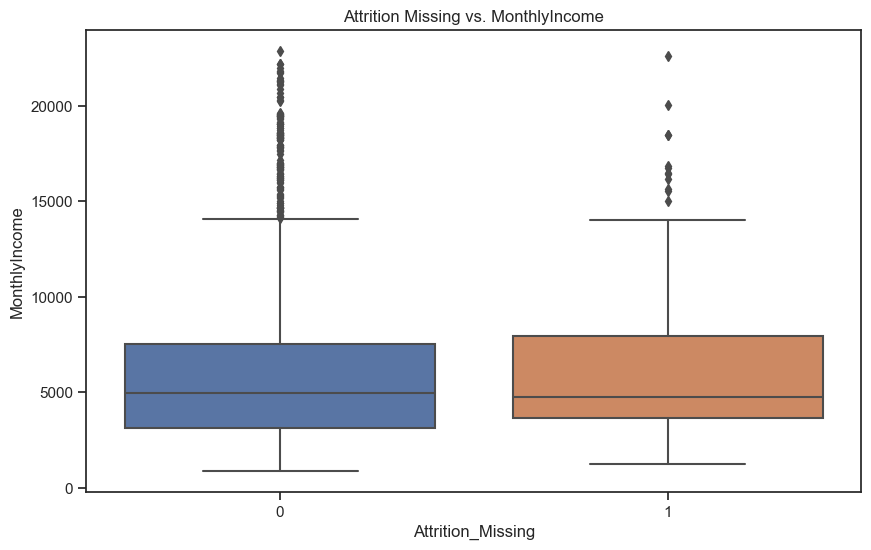

In [995]:
c_2 = ['TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']

for feature in c_2:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition_Missing', y=feature, data=df)
    plt.title(f'Attrition Missing vs. {feature}')
    plt.show()

By comparing Attrition with the other variables, the trend of the values of our target variable remains unchanged. Therefore, we can consider the choice of dropping the missing values of that

In [996]:
df.dropna(subset=["Attrition"], inplace=True)
df.drop('Attrition_Missing', axis=1, inplace=True)

In [997]:
missing_values_after_last_drop = df.isnull().sum()
print(missing_values_after_last_drop)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [998]:
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("Second Attrition File.html")

Let's have a look to all the features which have more than 10% of 0 values

In [999]:
zero_percentage = (df == 0).mean()
features_with_high_zero_percentage = zero_percentage[zero_percentage > 0.1].index

print("Features with more than 10% zero values:")
print(features_with_high_zero_percentage)

Features with more than 10% zero values:
Index(['NumCompaniesWorked', 'StockOptionLevel', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


We decide to leave it as it is because these 0 values have an imporant meaning for our goal

After checking the second attrition File, we noticed that in this situation, some features won't offer any discriminatory power, and their inclusion in analysis or modeling might not be necessary

In [1000]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel'], inplace=True)
print("Columns after dropping:", df.columns)

Columns after dropping: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


We also decided to round the specified columns to integers and to round the specified columns to 2 decimals in our Dataset

In [1001]:
df[['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = df[['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].round().astype(int)
columns_to_round_2_decimals = ['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                               'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                               'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating',
                               'RelationshipSatisfaction', 'WorkLifeBalance']
df[columns_to_round_2_decimals] = df[columns_to_round_2_decimals].round(2)

print(df[['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].head())
print(df[columns_to_round_2_decimals].head())

   NumCompaniesWorked  TotalWorkingYears  TrainingTimesLastYear  \
0                   7                  8                      0   
1                   1                  9                      3   
2                   6                  8                      3   
3                   1                  8                      3   
4                  10                  6                      3   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   8                        1   
2               0                   0                        0   
3               8                   6                        3   
4               2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     6  
2                     0  
3                     0  
4                     2  
   DailyRate  DistanceFromHome  Education  E

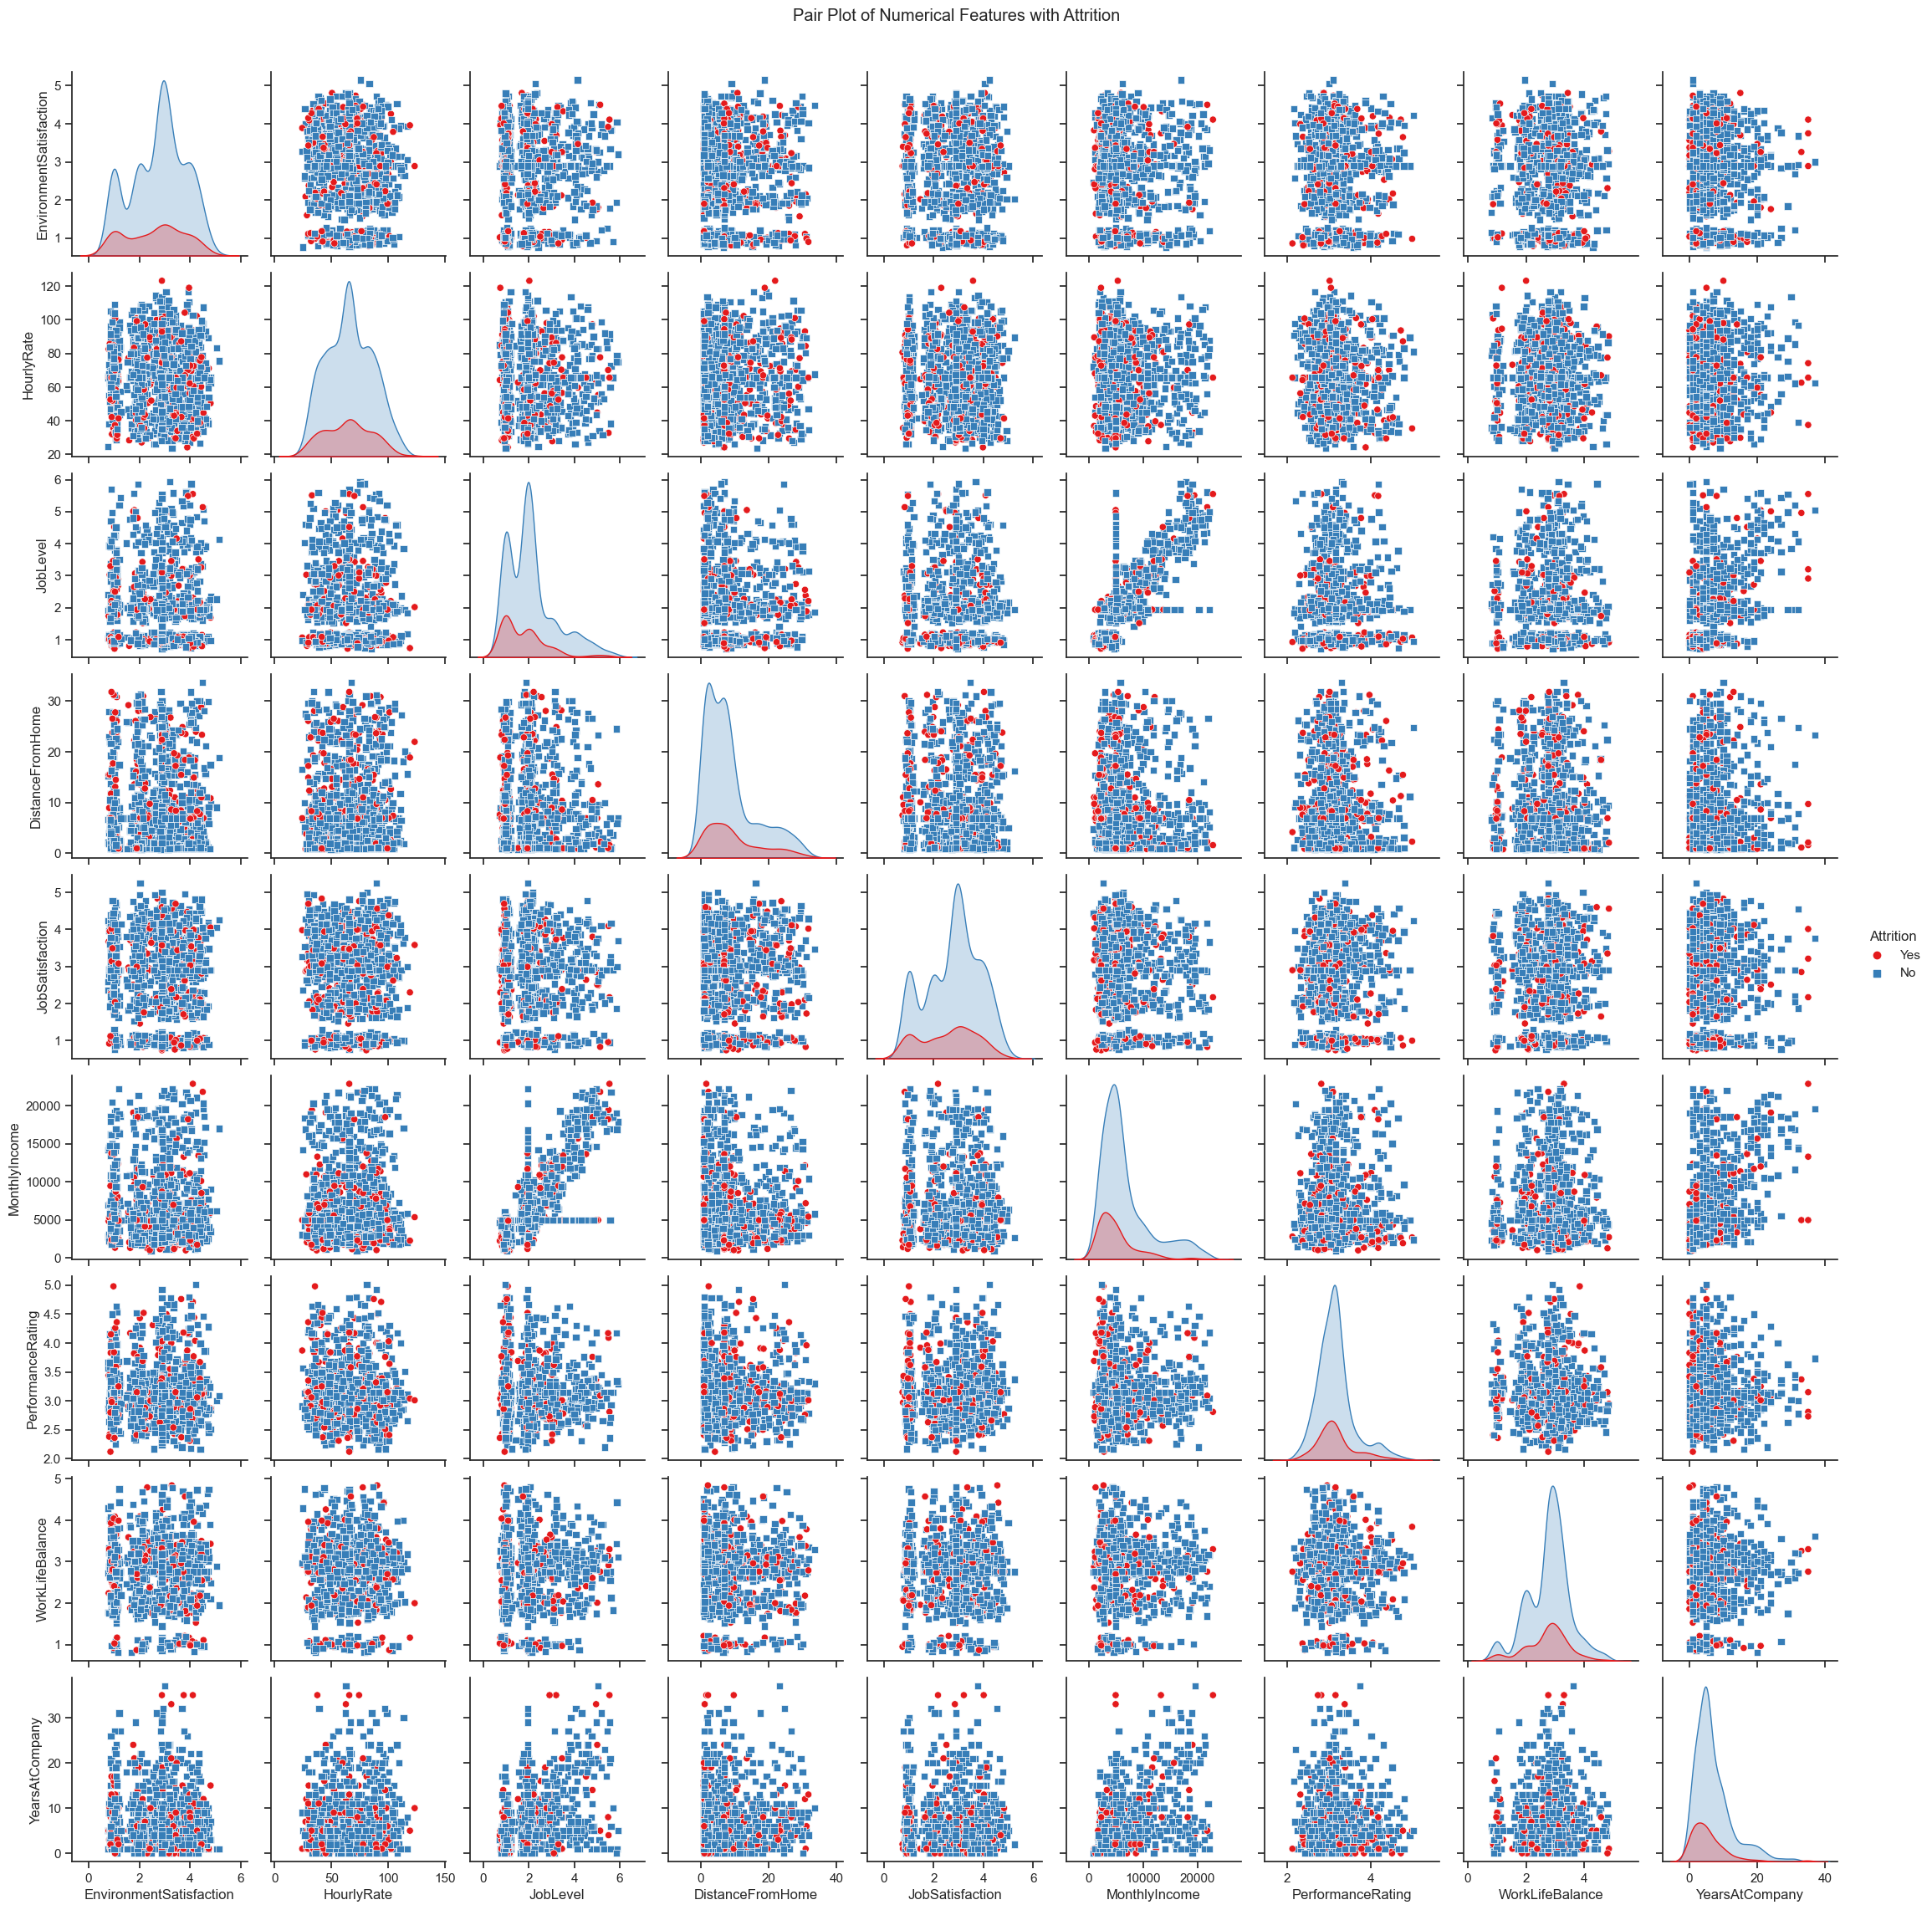

In [1002]:
choosen_features = ['EnvironmentSatisfaction', 'HourlyRate', 'JobLevel', 'DistanceFromHome',
                       'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating',
                       'WorkLifeBalance', 'YearsAtCompany', 'Attrition']
choosen_df = df[choosen_features]


sns.set(style="ticks")
sns.pairplot(choosen_df, hue='Attrition', markers=["o", "s"], palette="Set1")
plt.suptitle("Pair Plot of Numerical Features with Attrition", y=1.02)
plt.show()

Pre-processing

Encoding

In [1003]:
total_features = len(df.columns)
print("Total number of features:", total_features)

Total number of features: 31


In [1004]:
all_features = df.columns.tolist()
print("List of all features:")
print(all_features)

List of all features:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


PCA is generally used for unsupervised dimensionality reduction
 
PCA is a technique that is not dependent on the scale or type of features. It is a variance-based method that tries to capture the maximum variance in the data. Therefore, you typically don't need to encode categorical features before applying PCA. However, it's essential to standardize your numerical features (subtract the mean and divide by the standard deviation) to ensure that all features contribute equally to the analysis.

LDA is used for supervised dimensionality reduction with the goal of maximizing class separability

LDA, being a supervised method, considers class information. Categorical features need to be encoded into numerical format, as LDA works with numerical values. You can use techniques like one-hot encoding for categorical features.

For LDA, it's also crucial to have class labels associated with each data point. In your case, the 'Attrition' feature seems to be a binary class label indicating whether an employee has left the company or not.

Summary:
PCA: Standardize numerical features, and you can keep categorical features without encoding.

LDA: Encode categorical features (e.g., one-hot encoding) and make sure you have class labels associated with each data point.

Remember to split your dataset into training and testing sets before performing any encoding or dimensionality reduction, and apply the transformations learned on the training set to the testing set to avoid data leakage.







In [1005]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Drop the target variable 'Attrition' for now

In [1006]:
X = df.drop('Attrition', axis=1).copy()

In [1007]:
numerical_columns = X.select_dtypes(include=['int64', 'int32', 'float64', 'bool']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

Standardize numerical features

In [1008]:
scaler = StandardScaler()
X_scaled = X.copy() 
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

Encode categorical variables

In [1009]:
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(label_encoder.fit_transform)

Encode binary categorical variables using one-hot encoding

In [1010]:
X = pd.get_dummies(X, columns=['Gender', 'Over18', 'OverTime'], drop_first=True)

After these preprocessing steps, our data in the DataFrame X_scaled is ready for PCA. We can now proceed to apply PCA to reduce the dimensionality of our data

We split the data into training and testing sets 10% because of the dimension of our DataFrame. The features are stored in X, and our target variable 'Attrition' is extracted from the DataFrame

In [1011]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Attrition'], test_size=0.1, random_state=42)

Apply PCA

In [1012]:
from sklearn.decomposition import PCA

We are going to try to preserve as much variance as possible and we should pick the eigenvectors with the biggest eigenvalues, because they are going to capture the most data

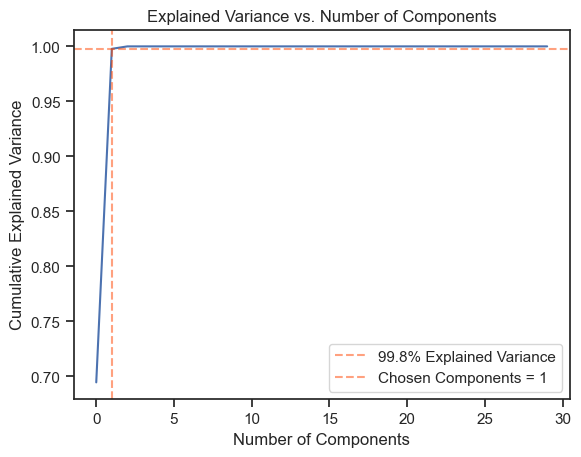

In [1013]:
pca = PCA()
X_pca = pca.fit_transform(X_train)  

plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(0.998, color='orangered', alpha=0.5, ls='--', label='99.8% Explained Variance')

chosen_components = 1
plt.axvline(chosen_components, color='orangered', alpha=0.5, ls='--', label=f'Chosen Components = {chosen_components}')
plt.legend()
plt.show()

In [1014]:
pca = PCA(1)
projected = pca.fit_transform(X_train)

In [1015]:
projected.shape

(1179, 1)

In [1016]:
projected

array([[ -3242.58961429],
       [ 12748.77045982],
       [   -29.4087693 ],
       ...,
       [ -8341.7471347 ],
       [-10128.98249087],
       [  -669.77582222]])

In [1017]:
df_pca = pd.DataFrame(projected, columns =['C1'])
df_pca["Attrition"] = df["Attrition"]
df_pca.head()

,C1,Attrition
0,-3242.589614,Yes
1,12748.770460,No
2,-29.408769,Yes
3,-72.138403,No
4,-39.567506,No


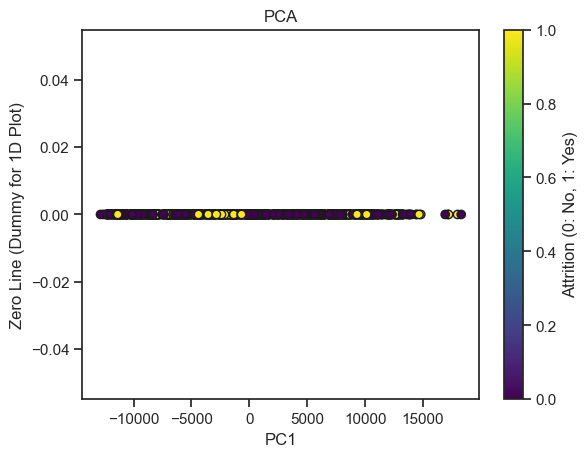

In [1036]:
color_mapping = {'Yes': 1, 'No': 0}
colors = y_train.map(color_mapping)

plt.scatter(X_train_pca, np.zeros_like(X_train_pca), c=colors, cmap='viridis', edgecolor='k', alpha=1)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('Zero Line (Dummy for 1D Plot)')
plt.colorbar(label='Attrition (0: No, 1: Yes)')
plt.show()

Apply LDA

In [1019]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

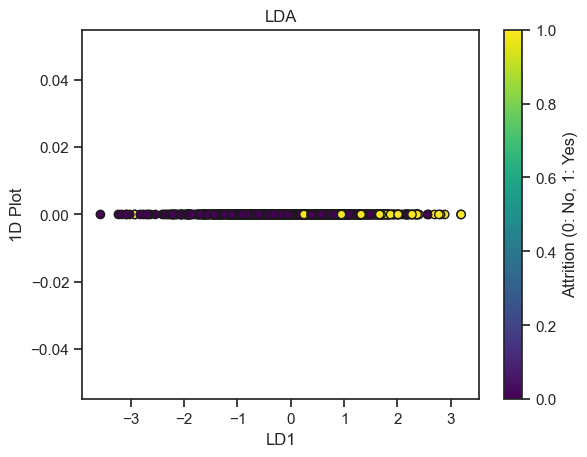

In [1035]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_train.map(color_mapping), cmap='viridis', edgecolor='k', alpha=1)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('1D Plot')
plt.colorbar(label='Attrition (0: No, 1: Yes)')
plt.show()

Statistical Techniques:


● Use descriptive statistical analyses to explore and evaluate the data set, including measures of
central tendency and dispersion and frequency distributions. Correlation matrices are also
accepted. Provide a summary of your findings. (0-30 marks)


● Formulate and test hypotheses within a business context using appropriate statistical techniques
like t-tests or ANOVA to identify significant relationships between variables. Provide a summary of
your findings. Use at least two statistical tests. (0-40 marks)


● Use a Jupyter notebook to produce result sets from the provided dataset, such as scatter plots or
regression models. Provide a summary of your findings. (0-10 marks)


● Write the results of the analysis of your findings to stakeholders using clear and concise
explanations, visualisations, and appropriate statistical terminology. (0-20 marks)

In [ ]:
from scipy import stats

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,42,Yes,Travel_Rarely,990.11,Sales,1.02,1.77,Life Sciences,2.15,Male,...,9.90,2.84,1.01,8,0,1.05,6,4,0,5
1,52,No,Travel_Frequently,276.78,Research & Development,6.92,1.04,Life Sciences,3.47,Male,...,14.49,4.12,4.31,9,3,2.53,10,8,1,6
2,33,Yes,Travel_Rarely,1204.16,Research & Development,2.20,2.12,Other,3.98,Male,...,15.40,2.78,2.33,8,3,2.92,0,0,0,0
3,35,No,Travel_Frequently,1352.75,Sales,2.94,3.67,Life Sciences,3.73,Female,...,9.76,2.77,3.03,8,3,3.12,8,6,3,0
4,25,No,Travel_Rarely,485.05,Research & Development,1.99,1.12,Medical,1.08,Male,...,11.92,3.28,2.89,6,3,3.11,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,No,Travel_Rarely,1277.64,Sales,5.13,3.23,Other,4.39,Female,...,16.39,2.86,4.56,5,2,3.11,4,2,0,0
1465,37,No,Travel_Frequently,914.06,Research & Development,21.65,2.92,Medical,3.17,Male,...,17.92,2.97,3.02,9,3,2.82,5,2,0,3
1466,35,No,Travel_Rarely,574.68,Research & Development,6.03,1.12,Medical,4.28,Male,...,14.69,2.80,1.01,9,5,2.56,7,8,1,7
1467,27,No,Travel_Rarely,151.51,Research & Development,6.92,3.48,Life Sciences,2.15,Male,...,18.74,3.15,1.95,6,0,2.59,6,2,0,3


Let's compute the descriptive statistics for all the numerical variables. Here we can see measure of Central Tendency such as Mean, Median, Mode and Standard Deviation & measure of dispersion like Standard Deviation 

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,...,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,36.680916,802.091290,8.818344,2.938290,2.725290,65.701786,2.744832,2.039947,2.746840,6384.171817,...,15.229466,3.148290,2.721534,11.192366,2.832824,2.767198,6.722901,4.130534,2.061832,4.031298
std,9.283524,392.541806,7.762956,1.011391,1.074811,20.292845,0.725082,1.074670,1.079498,4553.218610,...,3.796915,0.449576,1.061521,7.688627,1.258247,0.721796,5.712652,3.513445,3.076314,3.443278
min,15.000000,86.830000,0.750000,0.770000,0.760000,23.860000,0.830000,0.720000,0.740000,891.480000,...,7.680000,2.120000,0.720000,0.000000,0.000000,0.810000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,493.810000,2.252500,2.220000,1.940000,49.315000,2.240000,1.062500,1.960000,3149.305000,...,12.452500,2.870000,1.952500,6.000000,2.000000,2.310000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,801.390000,6.920000,2.920000,2.890000,65.650000,2.780000,1.940000,2.900000,4954.750000,...,14.490000,3.120000,2.890000,9.000000,3.000000,2.820000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1103.182500,11.522500,3.610000,3.487500,81.462500,3.140000,2.280000,3.557500,7541.317500,...,17.110000,3.300000,3.447500,14.000000,3.000000,3.170000,9.000000,7.000000,2.000000,7.000000
max,67.000000,1784.390000,33.680000,6.290000,5.150000,123.200000,5.240000,5.940000,5.250000,22858.020000,...,29.420000,5.010000,4.980000,44.000000,8.000000,4.840000,37.000000,19.000000,17.000000,20.000000


References:

https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/#google_vignette

https://statisticsbyjim.com/basics/assessing-normality-histograms-probability-plots/

https://www.spiceworks.com/hr/engagement-retention/articles/what-is-attrition-complete-guide/#_001